In [1]:
text = "This is my test text."

In [2]:
def count_words(text):
    """
    Count the number of times each word occurs in text (str). Return 
    dictionary where keys are unique words and values are word counts.
    Skip ponctuations
    """
    text = text.lower()
    # escaping the ponctuation marks
    skips = [".",",","!",":",'"',"'"]
    
    for skip in skips:
        text = text.replace(skip, "")
    
    word_counts = {}
    #text.split()
    for word in text.split(" "):
        # Known word
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
        
    return word_counts
        

In [3]:
count_words(text)

{'is': 1, 'my': 1, 'test': 1, 'text': 1, 'this': 1}

## Using the counter python Object

In [2]:
from collections import Counter

def count_words_fast(text):
    """
    Count the number of times each word occurs in text (str). Return 
    dictionary where keys are unique words and values are word counts.
    Skip ponctuations
    """
    text = text.lower()
    # escaping the ponctuation marks
    skips = [".",",","!",":",'"',"'"]
    
    for skip in skips:
        text = text.replace(skip, "")
    
    word_counts = Counter(text.split(" "))
    
        
    return word_counts
        

In [5]:
count_words_fast(text)

Counter({'is': 1, 'my': 1, 'test': 1, 'text': 1, 'this': 1})

In [6]:
count_words(text) == count_words_fast(text)

True

## Reading books

In [7]:
def read_book(title_path):
    """
    Read a book and return it as a string
    """
    
    with open(title_path, "r") as current_file:
        text = current_file.read()
        text = text.replace("\n","").replace("\r","")
    return text

In [8]:
text = read_book("MyBook.txt")

IOError: [Errno 2] No such file or directory: 'MyBook.txt'

In [ ]:
text

In [ ]:
len(text)

In [ ]:
count_words_fast(text)

In [ ]:
ind = text.find("a")

In [ ]:
sample_text = text[ind : ind + 100]

In [ ]:
sample_text

## Words statistics 

In [9]:
def word_stats(word_counts):
    """
    Return number of unique words and word frequencies
    """
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique,counts)

In [10]:
(unique, freq) = word_stats(count_words_fast(text))

In [11]:
sum(freq)

5

## Reading multiple files

In [12]:
import os 
book_dir = "./Books"
os.listdir(book_dir)

['Portuguese', 'English', 'German', 'French']

In [13]:
import pandas as pd


table = pd.DataFrame(columns=["name","age"])

table.loc[1] = "James", 22

table.loc[2] = "Jess", 32

In [14]:
table

,name,age
1,James,22.0
2,Jess,32.0


In [15]:
def read_multiple_files():
    stats = pd.DataFrame(columns=['language',"author","title","length","unique"])
    title_num = 1
    for language in os.listdir(book_dir):
        for author in os.listdir(book_dir+"/"+language):
            for title in os.listdir(book_dir+"/"+language+"/"+author):
                inputfile = book_dir+"/"+language+"/"+author+"/"+title
                print(inputfile)
                text = read_book(inputfile)
                (num_unique, counts) = word_stats(count_words(text))
                ###
                ### PANDAS INSERTION ! dframe.loc[i]
                ###
                stats.loc[title_num] = language, author.capitalize(), title.replace("txt",''), sum(counts), num_unique
                title_num += 1
    return stats

In [16]:
dframe = read_multiple_files()

./Books/Portuguese/branco/Agulha em Palheiro.txt
./Books/Portuguese/branco/Livro de Consolação.txt
./Books/Portuguese/branco/Amor de Salvação.txt
./Books/Portuguese/branco/O Regicida.txt
./Books/Portuguese/branco/A Filha do Arcediago.txt
./Books/Portuguese/branco/Estrellas Prop°cias.txt
./Books/Portuguese/branco/O Olho de Vidro.txt
./Books/Portuguese/branco/Lagrimas Abenáoadas.txt
./Books/Portuguese/branco/Carlota Angela.txt
./Books/Portuguese/branco/A Neta do Arcediago.txt
./Books/Portuguese/branco/O que fazem mulheres.txt
./Books/Portuguese/branco/Amor de Perdição.txt
./Books/Portuguese/branco/Scenas Contemporaneas.txt
./Books/Portuguese/branco/Estrellas Funestas.txt
./Books/Portuguese/branco/Annos de Prosa.txt
./Books/Portuguese/branco/A Queda d'um Anjo.txt
./Books/Portuguese/shakespeare/Hamlet.txt
./Books/Portuguese/Queir¢s/A Illustre Casa de Ramires.txt
./Books/Portuguese/Queir¢s/O Mandarim.txt
./Books/Portuguese/Queir¢s/Os Maias.txt
./Books/Portuguese/Queir¢s/A Rel°quia.tx

In [17]:
dframe.head()

,language,author,title,length,unique
1,Portuguese,Branco,Agulha em Palheiro.,43575.0,12773.0
2,Portuguese,Branco,Livro de Consolação.,54151.0,15965.0
3,Portuguese,Branco,Amor de Salvação.,47739.0,14392.0
4,Portuguese,Branco,O Regicida.,50751.0,14909.0
5,Portuguese,Branco,A Filha do Arcediago.,74446.0,18154.0


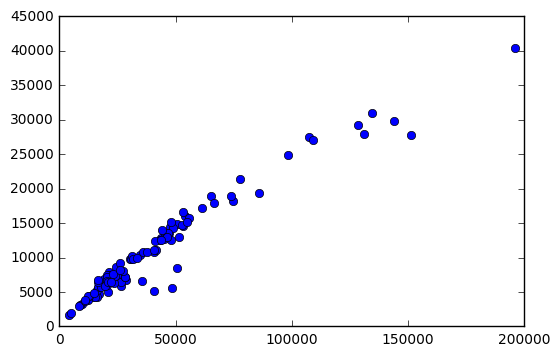

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(dframe.length, dframe.unique,"bo")

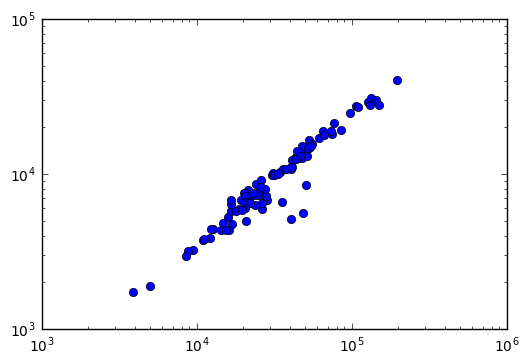

In [20]:
plt.loglog(dframe.length, dframe.unique,"bo")

In [21]:
dframe[dframe.language == "English"]

,language,author,title,length,unique
30,English,Shakespeare,The Merchant of Venice.,20949.0,4978.0
31,English,Shakespeare,Hamlet.,28551.0,6776.0
32,English,Shakespeare,Macbeth.,16874.0,4780.0
33,English,Shakespeare,Romeo and Juliet.,40776.0,5112.0
34,English,Shakespeare,A Midsummer Night's Dream.,16103.0,4345.0
35,English,Shakespeare,Richard III.,48315.0,5566.0
36,English,Shakespeare,Othello.,26590.0,5898.0


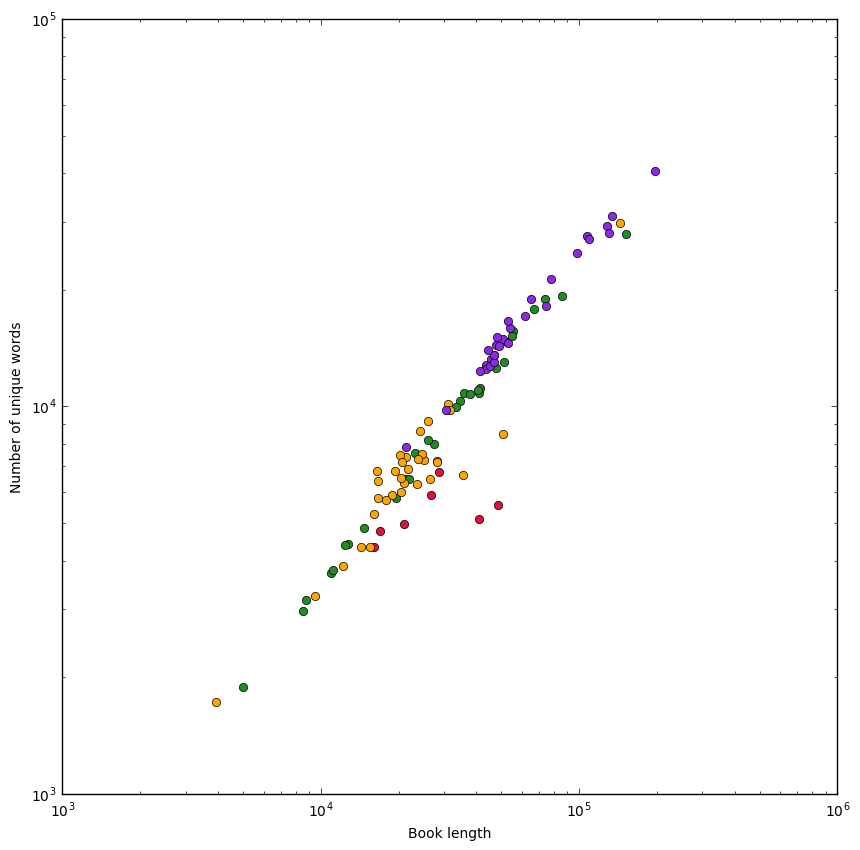

In [25]:
plt.figure(figsize=(10,10))
subset = dframe[dframe.language == "English"]
plt.loglog(subset.length, subset.unique,'o', label='English', color='crimson')

subset = dframe[dframe.language == "French"]
plt.loglog(subset.length, subset.unique,'o', label='English', color='forestgreen')

subset = dframe[dframe.language == "German"]
plt.loglog(subset.length, subset.unique,'o', label='English', color='orange')

subset = dframe[dframe.language == "Portuguese"]
plt.loglog(subset.length, subset.unique,'o', label='English', color='blueviolet')

plt.xlabel("Book length")
plt.ylabel("Number of unique words")
plt.savefig("lang_plot.pdf")

# Exercice

In [21]:
text = "This is my test text text."

def word_count_distribution(text):
    """
    Counting the distribution of words 
    """
    #text = read_book(book)
    
    word_counts = count_words_fast(text)
    
    freq_count = {}
    
    for key,value in word_counts.items():
        if value in freq_count:
            freq_count[value] += 1
        else:
            freq_count[value] = 1
        
    
    
    return freq_count

In [26]:
distribution = word_count_distribution(text)

In [27]:
distribution

{1: 4, 2: 1}

In [59]:
distribution = {1: 3029,
         2: 718,
         3: 297,
         4: 173,
         5: 128,
         6: 77,
         7: 58,
         8: 40,
         9: 47,
         10: 26,
         11: 32,
         12: 21,
         13: 16,
         14: 17,
         15: 14,
         16: 22,
         17: 9,
         18: 7,
         19: 7,
         20: 5,
         21: 12,
         22: 14,
         23: 5,
         24: 6,
         25: 5,
         26: 2,
         27: 3,
         28: 4,
         29: 4,
         30: 3,
         31: 1,
         32: 2,
         33: 2,
         34: 3,
         35: 1,
         36: 3,
         37: 2,
         38: 2,
         40: 2,
         42: 3,
         43: 4,
         44: 4,
         45: 2,
         46: 3,
         47: 1,
         49: 2,
         50: 3,
         51: 4,
         53: 4,
         54: 1,
         55: 1,
         56: 3,
         58: 3,
         59: 1,
         60: 1,
         62: 2,
         63: 2,
         64: 1,
         65: 1,
         69: 1,
         70: 1,
         71: 1,
         74: 2,
         76: 2,
         78: 1,
         79: 1,
         80: 1,
         81: 1,
         85: 1,
         87: 1,
         88: 1,
         89: 2,
         92: 1,
         98: 1,
         99: 1,
         103: 1,
         105: 1,
         106: 2,
         109: 1,
         111: 1,
         114: 1,
         115: 2,
         118: 1,
         122: 1,
         123: 1,
         125: 1,
         129: 1,
         138: 1,
         141: 1,
         147: 1,
         151: 1,
         154: 1,
         155: 1,
         157: 1,
         165: 1,
         180: 1,
         208: 1,
         212: 1,
         226: 1,
         235: 1,
         242: 1,
         258: 1,
         260: 2,
         304: 1,
         344: 1,
         345: 2,
         350: 1,
         472: 1,
         476: 1,
         560: 1,
         573: 1,
         711: 1,
         740: 1,
         3348: 1,
         105109: 1}

In [2]:
total = sum(distribution)

In [3]:
distribution

{1: 3029,
 2: 718,
 3: 297,
 4: 173,
 5: 128,
 6: 77,
 7: 58,
 8: 40,
 9: 47,
 10: 26,
 11: 32,
 12: 21,
 13: 16,
 14: 17,
 15: 14,
 16: 22,
 17: 9,
 18: 7,
 19: 7,
 20: 5,
 21: 12,
 22: 14,
 23: 5,
 24: 6,
 25: 5,
 26: 2,
 27: 3,
 28: 4,
 29: 4,
 30: 3,
 31: 1,
 32: 2,
 33: 2,
 34: 3,
 35: 1,
 36: 3,
 37: 2,
 38: 2,
 40: 2,
 42: 3,
 43: 4,
 44: 4,
 45: 2,
 46: 3,
 47: 1,
 49: 2,
 50: 3,
 51: 4,
 53: 4,
 54: 1,
 55: 1,
 56: 3,
 58: 3,
 59: 1,
 60: 1,
 62: 2,
 63: 2,
 64: 1,
 65: 1,
 69: 1,
 70: 1,
 71: 1,
 74: 2,
 76: 2,
 78: 1,
 79: 1,
 80: 1,
 81: 1,
 85: 1,
 87: 1,
 88: 1,
 89: 2,
 92: 1,
 98: 1,
 99: 1,
 103: 1,
 105: 1,
 106: 2,
 109: 1,
 111: 1,
 114: 1,
 115: 2,
 118: 1,
 122: 1,
 123: 1,
 125: 1,
 129: 1,
 138: 1,
 141: 1,
 147: 1,
 151: 1,
 154: 1,
 155: 1,
 157: 1,
 165: 1,
 180: 1,
 208: 1,
 212: 1,
 226: 1,
 235: 1,
 242: 1,
 258: 1,
 260: 2,
 304: 1,
 344: 1,
 345: 2,
 350: 1,
 472: 1,
 476: 1,
 560: 1,
 573: 1,
 711: 1,
 740: 1,
 3348: 1,
 105109: 1}

In [77]:
120/220.0

0.5454545454545454

In [52]:
import numpy as np


def more_frequent(distribution):    
    total = sum(distribution)
    arr = distribution.values()
    arr_cumul = np.cumsum(list(reversed(arr)))[:-1]
    arr_cumul = list(reversed([0] + list(arr_cumul)))
    arr_cumul = np.asarray(arr_cumul)/(float)(sum(arr_cumul))
    cumul_dict = {}
    i = 0
    
    
    print arr_cumul
    
    for key, value in distribution.items():
        cumul_dict[key] = arr_cumul[i]
        i += 1
    return cumul_dict

In [53]:
more_frequent(distribution)

[  1.22563573e-01   7.62230541e-02   5.70543436e-02   4.58887311e-02
   3.76274687e-02   3.26578030e-02   2.89144185e-02   2.63327740e-02
   2.32993417e-02   2.16212728e-02   1.95559571e-02   1.82005938e-02
   1.71679360e-02   1.60707371e-02   1.51671615e-02   1.37472570e-02
   1.31663870e-02   1.27145992e-02   1.22628114e-02   1.19401058e-02
   1.11656125e-02   1.02620369e-02   9.93933135e-03   9.55208468e-03
   9.22937911e-03   9.10029689e-03   8.90667355e-03   8.64850910e-03
   8.39034465e-03   8.19672131e-03   8.13218020e-03   8.00309797e-03
   7.87401575e-03   7.68039241e-03   7.61585130e-03   7.42222796e-03
   7.29314573e-03   7.16406351e-03   7.03498128e-03   6.84135795e-03
   6.58319349e-03   6.32502904e-03   6.19594682e-03   6.00232348e-03
   5.93778237e-03   5.87324125e-03   5.74415903e-03   5.55053569e-03
   5.29237124e-03   5.03420679e-03   4.96966568e-03   4.90512456e-03
   4.71150123e-03   4.51787789e-03   4.45333678e-03   4.38879566e-03
   4.32425455e-03   4.19517232e-03

{1: 0.12256357299599845,
 2: 0.076223054085452435,
 3: 0.057054343616883954,
 4: 0.045888731121724535,
 5: 0.037627468697560347,
 6: 0.032657803020524075,
 7: 0.028914418484574673,
 8: 0.026332773977023365,
 9: 0.023299341680650575,
 10: 0.021621272750742222,
 11: 0.019555957144701173,
 12: 0.018200593778236736,
 13: 0.017167935975216212,
 14: 0.016070737059506904,
 15: 0.015167161481863946,
 16: 0.013747257002710726,
 17: 0.013166386988511683,
 18: 0.012714599199690202,
 19: 0.012262811410868723,
 20: 0.01194010584742481,
 21: 0.011165612495159417,
 22: 0.010262036917516457,
 23: 0.0099393313540725448,
 24: 0.0095520846779398472,
 25: 0.0092293791144959347,
 26: 0.0091002968891183682,
 27: 0.0089066735510520204,
 28: 0.0086485091002968893,
 29: 0.0083903446495417582,
 30: 0.0081967213114754103,
 31: 0.0081321801987866271,
 32: 0.0080030979734090624,
 33: 0.007874015748031496,
 34: 0.0076803924099651481,
 35: 0.0076158512972763649,
 36: 0.007422227959210017,
 37: 0.0072931457338324514,

In [64]:
def more_frequent2(distribution):
    counts = list(distribution.keys())
    frequency_of_counts = list(distribution.values())
    cumulative_frequencies = np.cumsum(frequency_of_counts)
    more_frequent = 1 - cumulative_frequencies / (float)(cumulative_frequencies[-1])
    return dict(zip(counts, more_frequent))
    
cumulative = more_frequent2(distribution)

In [65]:
cumulative

{1: 0.38534902597402598,
 2: 0.23965097402597402,
 3: 0.17938311688311692,
 4: 0.14427759740259738,
 5: 0.1183035714285714,
 6: 0.1026785714285714,
 7: 0.090909090909090939,
 8: 0.08279220779220775,
 9: 0.073254870129870087,
 10: 0.067978896103896069,
 11: 0.061485389610389629,
 12: 0.057224025974025983,
 13: 0.053977272727272707,
 14: 0.05052759740259738,
 15: 0.047686688311688319,
 16: 0.04322240259740262,
 17: 0.041396103896103931,
 18: 0.039975649350649345,
 19: 0.038555194805194759,
 20: 0.037540584415584388,
 21: 0.035105519480519431,
 22: 0.032264610389610371,
 23: 0.03125,
 24: 0.030032467532467577,
 25: 0.029017857142857095,
 26: 0.028612012987012991,
 27: 0.028003246753246724,
 28: 0.027191558441558406,
 29: 0.026379870129870087,
 30: 0.025771103896103931,
 31: 0.025568181818181768,
 32: 0.025162337662337664,
 33: 0.02475649350649356,
 34: 0.024147727272727293,
 35: 0.023944805194805241,
 36: 0.023336038961038974,
 37: 0.022930194805194759,
 38: 0.022524350649350655,
 40: 0.0

In [71]:
1 - np.cumsum(list(distribution.values()))/(float)(np.cumsum(list(distribution.values()))[-1])

array([  3.85349026e-01,   2.39650974e-01,   1.79383117e-01,
         1.44277597e-01,   1.18303571e-01,   1.02678571e-01,
         9.09090909e-02,   8.27922078e-02,   7.32548701e-02,
         6.79788961e-02,   6.14853896e-02,   5.72240260e-02,
         5.39772727e-02,   5.05275974e-02,   4.76866883e-02,
         4.32224026e-02,   4.13961039e-02,   3.99756494e-02,
         3.85551948e-02,   3.75405844e-02,   3.51055195e-02,
         3.22646104e-02,   3.12500000e-02,   3.00324675e-02,
         2.90178571e-02,   2.86120130e-02,   2.80032468e-02,
         2.71915584e-02,   2.63798701e-02,   2.57711039e-02,
         2.55681818e-02,   2.51623377e-02,   2.47564935e-02,
         2.41477273e-02,   2.39448052e-02,   2.33360390e-02,
         2.29301948e-02,   2.25243506e-02,   2.21185065e-02,
         2.15097403e-02,   2.06980519e-02,   1.98863636e-02,
         1.94805195e-02,   1.88717532e-02,   1.86688312e-02,
         1.84659091e-02,   1.80600649e-02,   1.74512987e-02,
         1.66396104e-02,